### Aim :-
Build the Machine learning model that need to predict whether a person makes over 50K per year or not using adult dataset.

### Data Set Information :-

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

### load required libraries :-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### load data set :-

In [3]:
train_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)

In [4]:
test_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test" ,skiprows = 1, header = None)

In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [6]:
train_set.columns = col_labels

test_set.columns = col_labels

### Display top 5 rows

In [7]:
## for training data
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
## for testing data
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Display Last 5 rows

In [9]:
## for training data
train_set.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
## for testing data
test_set.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


###### In training and testing data we see some feature contain "?" value that means this information will not present so, we replace this value with nan value.

In [11]:
train_set.replace({" ?" : np.nan},inplace = True)

In [12]:
test_set.replace({" ?" : np.nan},inplace = True)

### Data Profiling :-

##### 1) Size of DataSet

In [13]:
## for training data
train_set.shape

(32561, 15)

There are 32561 number of rows and 15 number of columns in training data

In [14]:
## for testing data
test_set.shape

(16281, 15)

There are 16281 number of rows and 15 number of columns in testing data

#### 2) Number of missing values per column 

In [15]:
## for training dataset
train_set.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [16]:
## for testing dataset
test_set.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
wage_class          0
dtype: int64

#### 4) Dataset Information

In [17]:
## for training data
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
## for testing data
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16007 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


#### 5) Number of categorical columns and their list

In [19]:
## for training dataset
categorical_train = [column for column in train_set.columns if train_set[column].dtype == 'O']
categorical_train

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [20]:
print("Length Of categorical columns : ",len(categorical_train))

Length Of categorical columns :  9


In [21]:
## for testing data
categorical_test = [column for column in test_set.columns if test_set[column].dtype == 'O']
categorical_test

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [22]:
print("Length Of categorical columns : ",len(categorical_test))

Length Of categorical columns :  9


#### 6) Number of numerical columns and their list

In [23]:
## for training data
numerical_train = [column for column in train_set.columns if train_set[column].dtype != 'O']
numerical_train

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [24]:
print("Length Of numerical columns : ",len(numerical_train))

Length Of numerical columns :  6


In [25]:
## for testing data
numerical_test = [column for column in test_set.columns if test_set[column].dtype != 'O']
numerical_test

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [26]:
print("Length Of numerical columns : ",len(numerical_test))

Length Of numerical columns :  6


#### 7) Number of duplicate rows

In [27]:
## for training data
duplicate_train = train_set[train_set.duplicated()]
duplicate_train.shape

(24, 15)

There are 24 Duplicate rows in train dataset

In [28]:
## for testing data
duplicate_test = test_set[test_set.duplicated()]
duplicate_test.shape

(5, 15)

There are 5 Duplicate rows in test dataset

### Statistical Information 

The statistics that are generated by the describe() method:

1) count tells us the number of NoN-empty rows in a feature.

2) mean tells us the mean value of that feature.

3) std tells us the Standard Deviation Value of that feature.

4) min tells us the minimum value of that feature.

5) 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.

6) max tells us the maximum value of that feature.

In [29]:
## for training data
train_set.describe() # for Numerical columns

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
train_set.describe(include=['O']) # for categorical columns

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [31]:
## for testing data
test_set.describe() # for Numerical columns

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [32]:
test_set.describe(include = ['O']) # for categorical column

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,15318,16281,16281,15315,16281,16281,16281,16007,16281
unique,8,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
freq,11210,5283,7403,2032,6523,13946,10860,14662,12435


### Explotary Data Analysis :-

#### 1) For Categorical Features of Train dataset

In [33]:
categorical_train

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [34]:
for column in categorical_train :
    print("Unique Value Of ",column," : ",train_set[column].unique())
    print("\n")

Unique Value Of  workclass  :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']


Unique Value Of  education  :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Unique Value Of  marital_status  :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Unique Value Of  occupation  :  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


Unique Value Of  relationship  :  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Unique Value Of  race  :  [' White' ' Black' ' Asia

In [35]:
## Replace <=50k with 0 and >50k with 1 in train dataset
train_set["wage_class"].replace({' <=50K' : 0 ,' >50K' : 1}, inplace=True)
train_set["wage_class"]

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int64

In [36]:
## Replace <=50k with 0 and >50k with 1 in test dataset
test_set["wage_class"].replace({' <=50K.' : 0 ,' >50K.' : 1}, inplace=True)
test_set["wage_class"]

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: wage_class, Length: 16281, dtype: int64

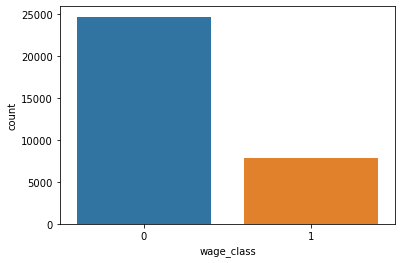

In [37]:
sns.countplot("wage_class",data = train_set)

##### As we see our dataset is imbalance bcz dataset contain more value of <=50K then >50k.

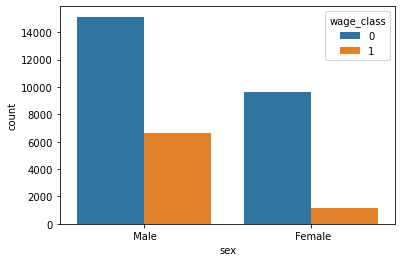

In [38]:
sns.countplot("sex" , hue = "wage_class" , data = train_set)

Male person makes over 50K per year than Female person.

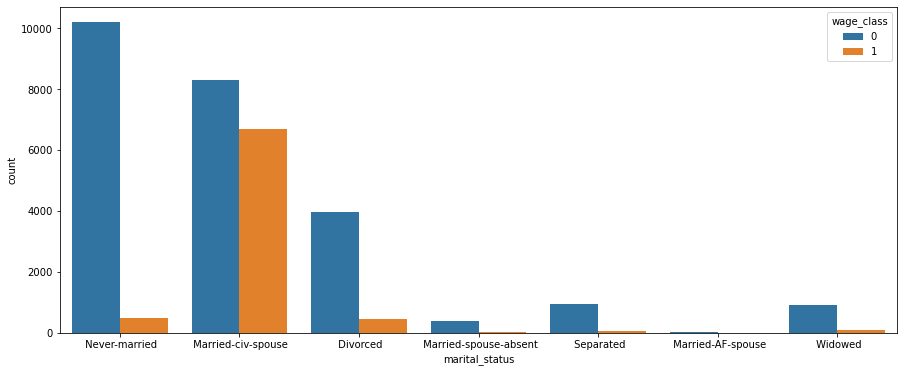

In [39]:
plt.figure(figsize = (15,6))
sns.countplot("marital_status" , hue = "wage_class" , data = train_set)

Married-civ-spouse person makes over 50K per year than other person.

"Married spouse absent", "separated", "Married AF Spouse", "Widowed" categore person does not make over 50k per year.

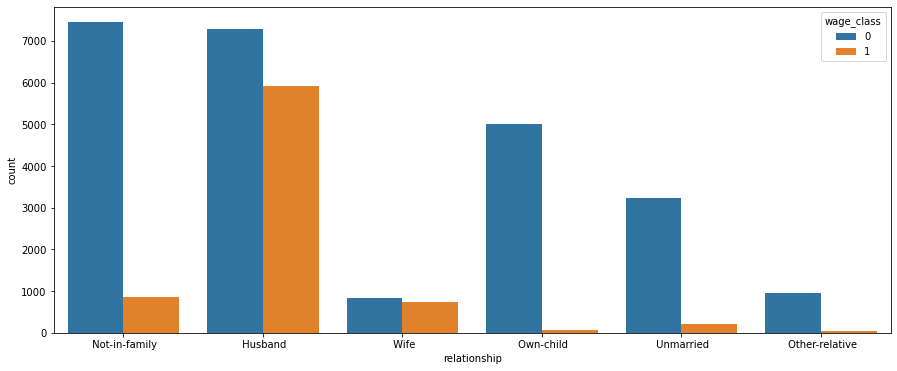

In [40]:
plt.figure(figsize = (15,6))
sns.countplot("relationship" , hue = "wage_class" , data = train_set)

Those person whose relationship is Husband make 50k over per year then other person.

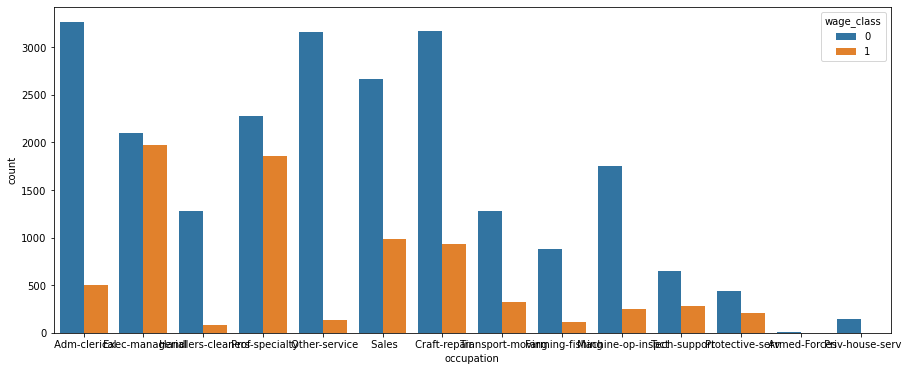

In [41]:
plt.figure(figsize = (15,6))
sns.countplot("occupation" , hue = "wage_class" , data = train_set)

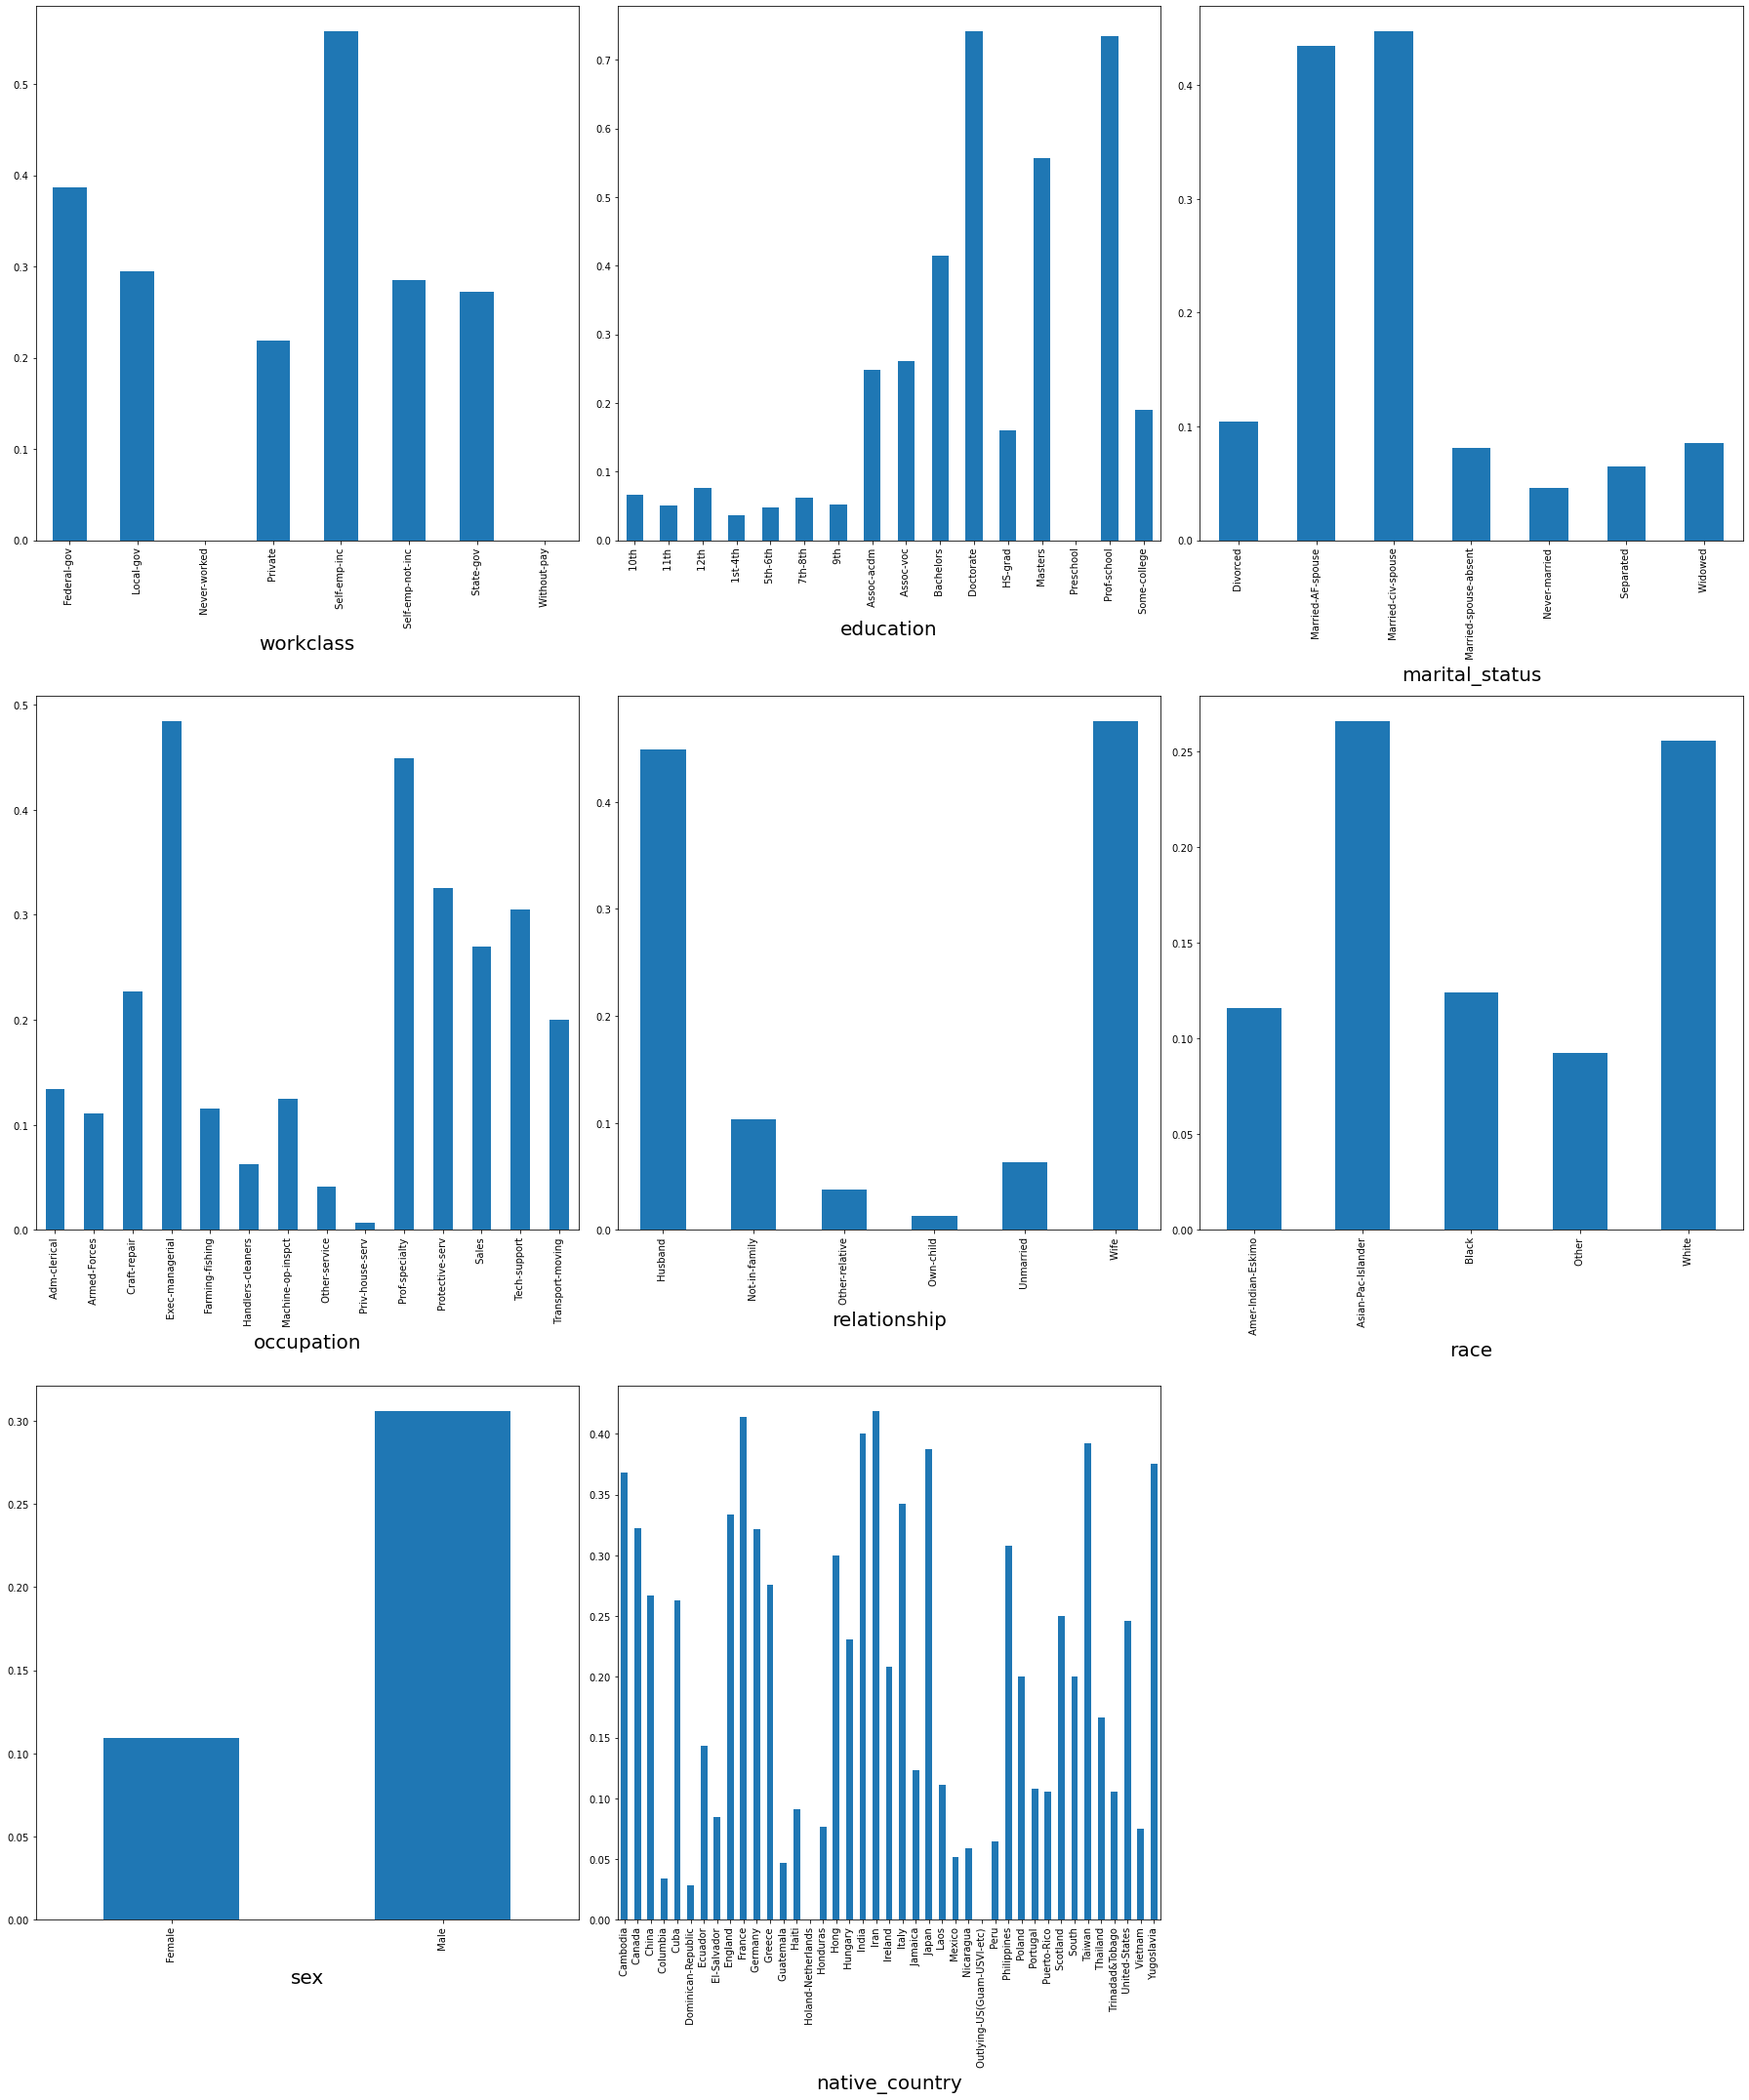

In [42]:
# plotting a bar graph for categorical features against wage_class to see the co-relation between these columns. 
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in categorical_train:
    if plotnumber<=14 and column != "wage_class":
        ax = plt.subplot(3,3,plotnumber)
        train_set.groupby(column).wage_class.mean().plot(kind='bar')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### Observation :-
1) Adults with an educational background of Prof-school and Doctorate will have a better income and it is likely possible that their income is higher than 50K.

2) Our data suggest that people with occupation Prof-specialty and Exec-managerial will have a better chance of earning an income of more than 50K.

3) The gender bar chart provides us some useful insight into the data that Men are more likely to have a higher income.

4) relationship feature shows us that wife and husband has a higher income then other married couple.

5) As per the data, an Asian-Pac-Islander or a white have more chances of earning more than 50K.

6) Self-emp-in, Federal-gov workclass groups have a higher chance of earning more than 50K.

#### 2) For Numercial Features of Train dataset

In [43]:
numerical_train

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [44]:
train_set[numerical_train]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


##### Count Unique value of numerical_train features

In [45]:
for column in numerical_train:
    print(len(train_set[column].unique())," unique values present in ",column," features")
    print("\n")

73  unique values present in  age  features


21648  unique values present in  fnlwgt  features


16  unique values present in  education_num  features


119  unique values present in  capital_gain  features


92  unique values present in  capital_loss  features


94  unique values present in  hours_per_week  features




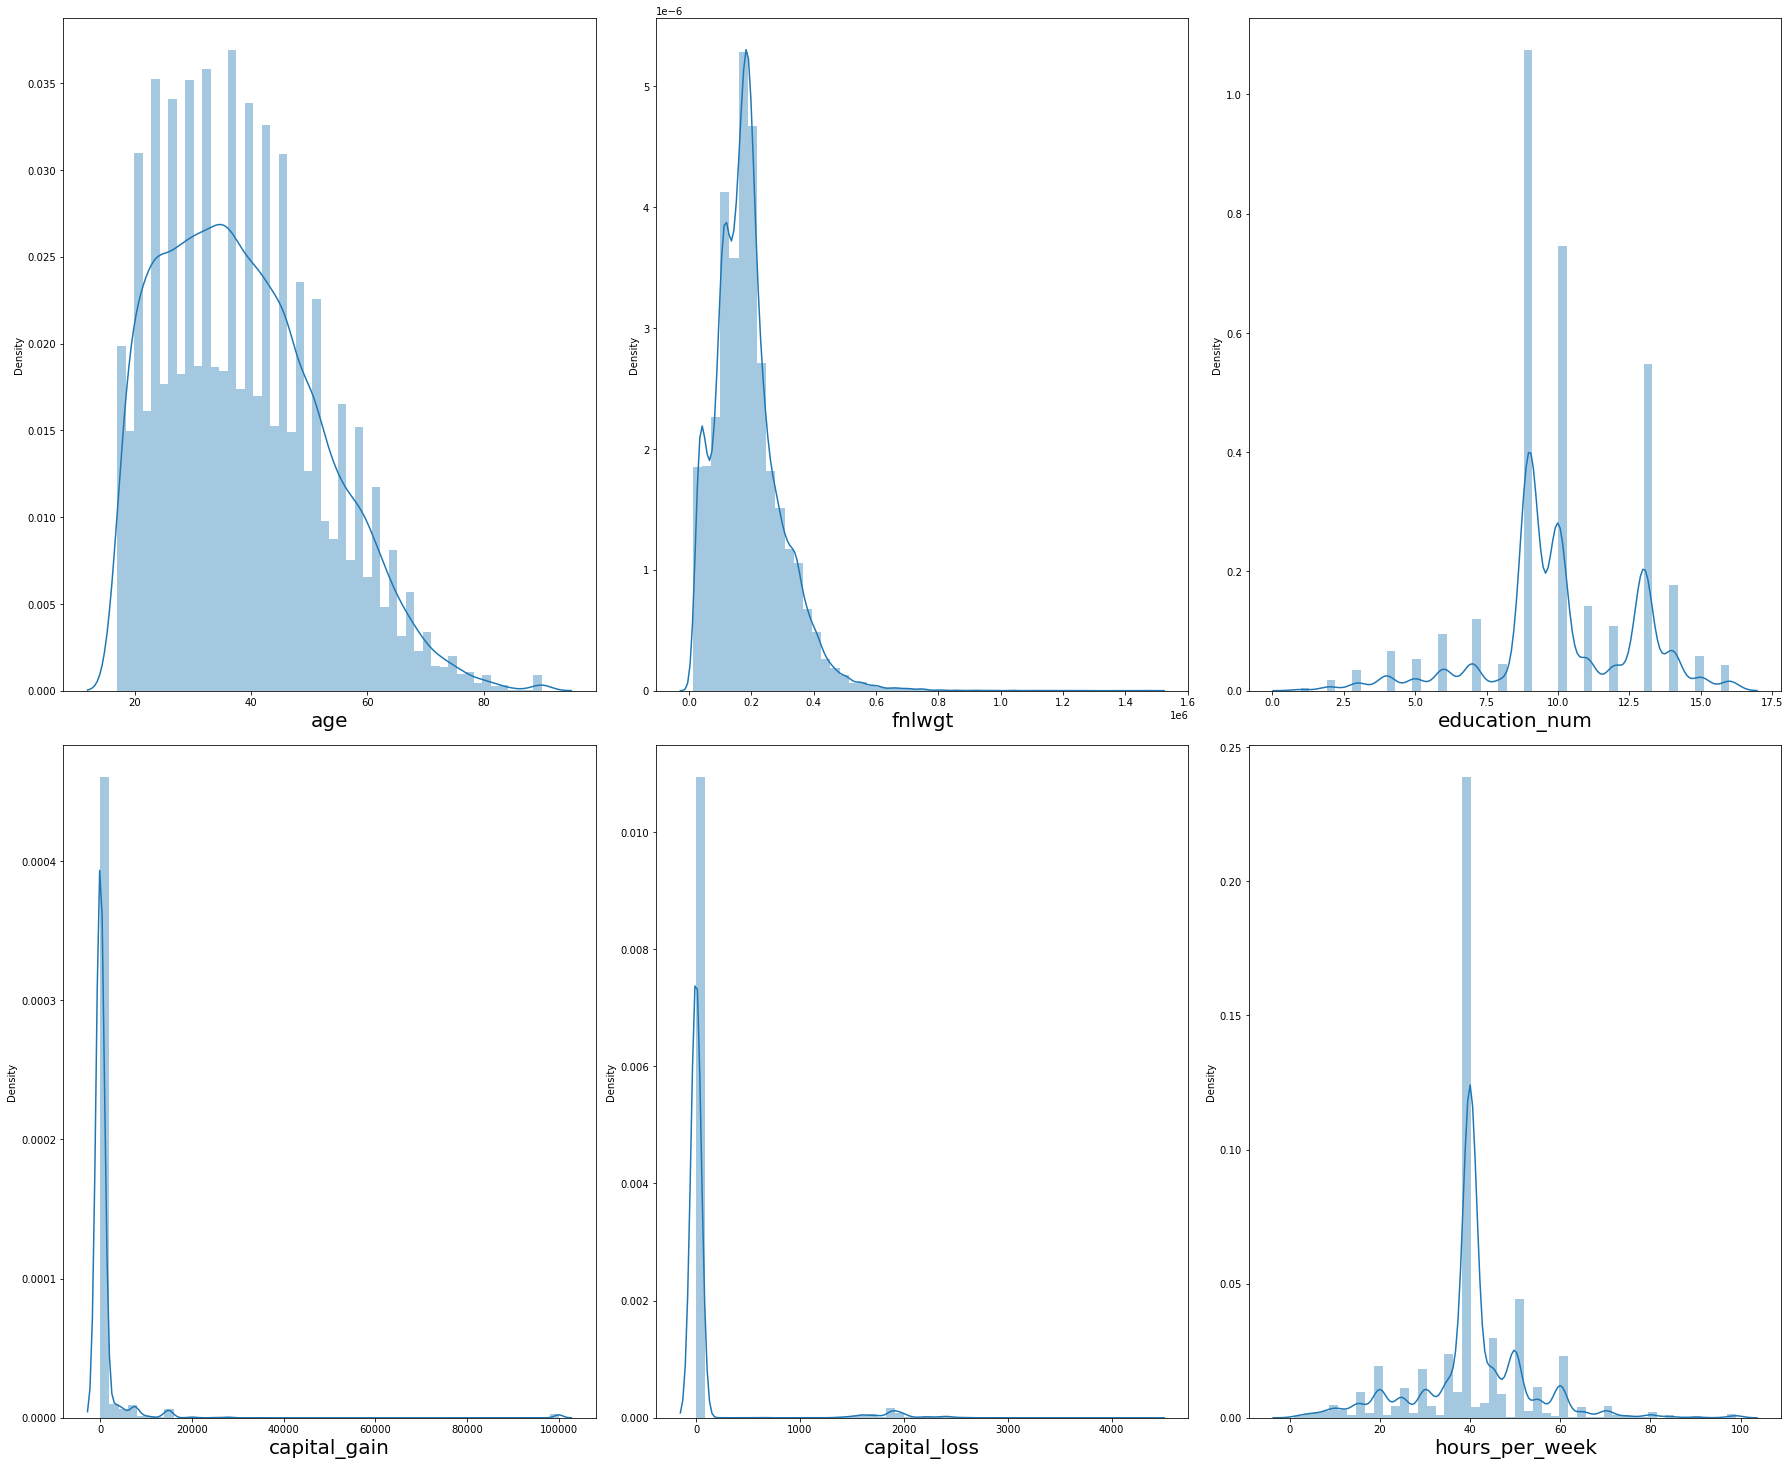

In [46]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in numerical_train:
    if plotnumber<=14:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train_set[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 3) Detect Outliers

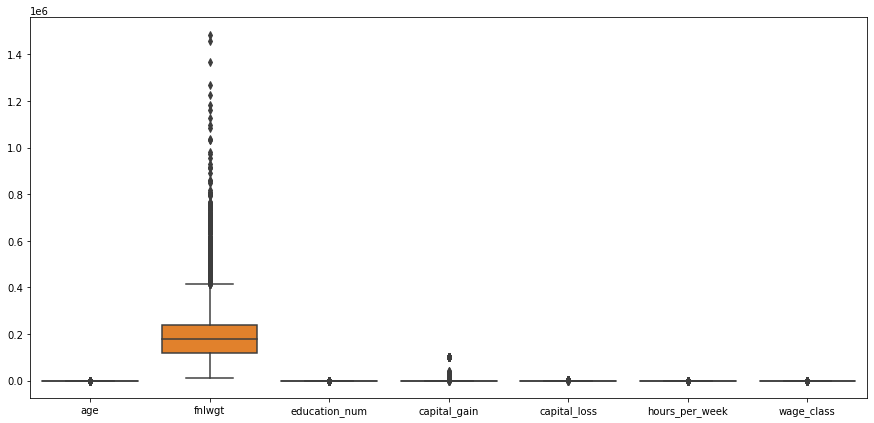

In [47]:
plt.figure(figsize = (15,7))
sns.boxplot(data = train_set)
plt.show()

In [48]:
for k, v in train_set[numerical_train].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(train_set)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.51%
Column fnlwgt outliers = 3.05%
Column education_num outliers = 3.68%
Column capital_gain outliers = 100.00%
Column capital_loss outliers = 100.00%
Column hours_per_week outliers = 27.66%


### Feature Engineering

#### 1) Drop Nan Value For Train dataset

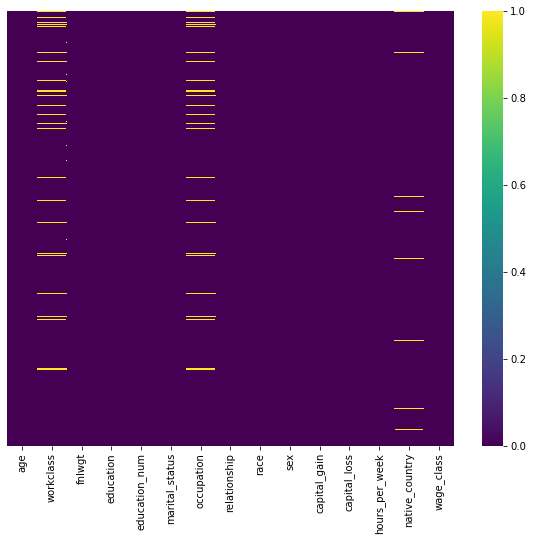

In [49]:
### Heat map for analysis Null Values
plt.figure(figsize = (10,8))
sns.heatmap(data = train_set.isnull() ,cmap = "viridis" , yticklabels = False )

"workclass" , "occupation" , "native_country" contain Null value and all of them are categorical features so, we can drop it.

In [50]:
### Hundle Nan Value with Frequency Category Imputation Method
def Impute_nan(data,feature):
    most_frequent_feature = data[feature].mode()[0]
    data[feature].fillna(most_frequent_feature,inplace = True)

In [51]:
Impute_nan(train_set,"workclass")

In [52]:
Impute_nan(train_set,"occupation")

In [53]:
Impute_nan(train_set,"native_country")

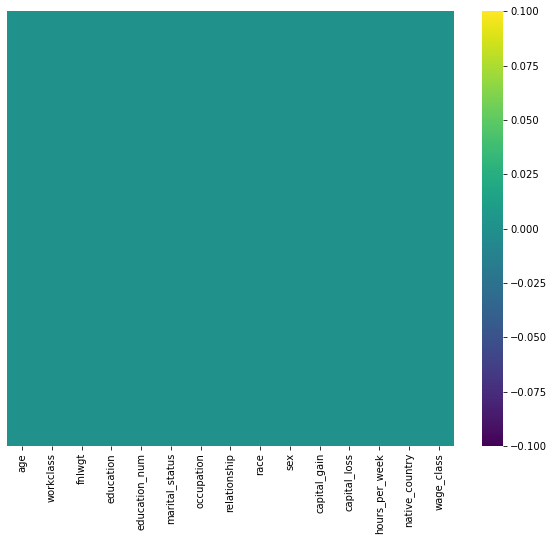

In [54]:
plt.figure(figsize = (10,8))
sns.heatmap(data = train_set.isnull() ,cmap = "viridis" , yticklabels = False )

#### 2) Drop Nan Value For test dataset

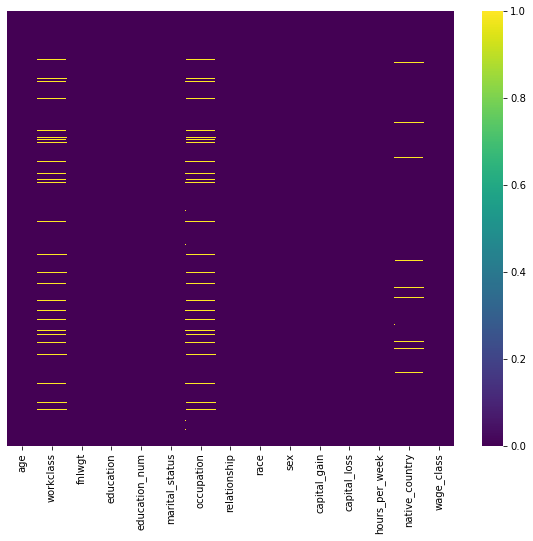

In [55]:
plt.figure(figsize = (10,8))
sns.heatmap(data = test_set.isnull() ,cmap = "viridis" , yticklabels = False )

In [56]:
Impute_nan(test_set,"workclass")

In [57]:
Impute_nan(test_set,"occupation")

In [58]:
Impute_nan(test_set,"native_country")

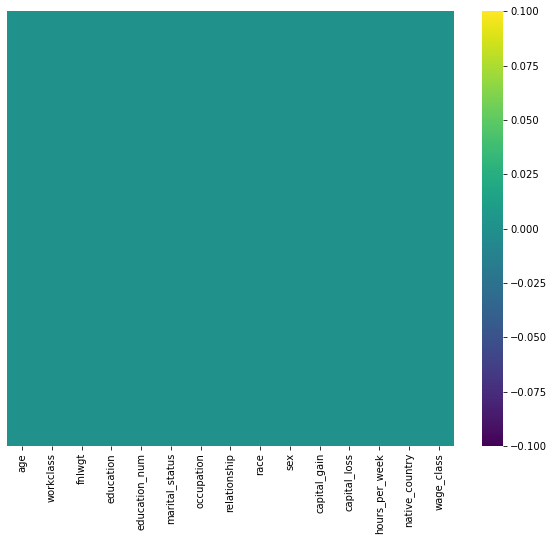

In [59]:
plt.figure(figsize = (10,8))
sns.heatmap(data = test_set.isnull() ,cmap = "viridis" , yticklabels = False )

In [60]:
#dropping based on uniquness of data from the train dataset 
train_set.drop(columns = ['capital_gain','capital_loss','native_country'],inplace=True)

In [61]:
#dropping based on uniquness of data from the test dataset 
test_set.drop(columns = ['capital_gain','capital_loss','native_country'],inplace=True)

#### 3) Handling Categorical Features

###### We use Ordinal Number Encoding Method

In [62]:
# Sex
train_set['sex'] = train_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)

# race
train_set['race'] = train_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)

# marital_status
train_set['marital_status'] = train_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [63]:
#workclass
train_set['workclass'] = train_set['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6,' Never-worked':7}).astype(int)

#education
train_set['education'] = train_set['education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15}).astype(int)

#occupation
train_set['occupation'] = train_set['occupation'].map({' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14}).astype(int)

#relationship
train_set['relationship'] = train_set['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)

In [64]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,wage_class
0,39,1,77516,12,13,5,3,0,3,0,40,0
1,50,6,83311,12,13,2,7,4,3,0,13,0
2,38,5,215646,3,9,4,4,0,3,0,40,0
3,53,5,234721,11,7,2,4,4,0,0,40,0
4,28,5,338409,12,13,2,5,1,0,1,40,0


In [65]:
# Sex
test_set['sex'] = test_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)

# race
test_set['race'] = test_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)

# marital_status
test_set['marital_status'] = test_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [66]:
#workclass
test_set['workclass'] = test_set['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6,' Never-worked':7}).astype(int)

#education
test_set['education'] = test_set['education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15}).astype(int)

#occupation
test_set['occupation'] = test_set['occupation'].map({' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14}).astype(int)

#relationship
test_set['relationship'] = test_set['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)

In [67]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,wage_class
0,25,5,226802,11,7,5,6,5,0,0,40,0
1,38,5,89814,3,9,2,1,4,3,0,50,0
2,28,4,336951,9,12,2,14,4,3,0,40,1
3,44,5,160323,0,10,2,6,4,0,0,40,1
4,18,5,103497,0,10,5,5,5,3,1,30,0


### Features Selection

In [68]:
dataset = train_set.drop(columns=["wage_class"])
y = train_set["wage_class"]

In [69]:
from sklearn.feature_selection import SelectKBest , chi2

In [70]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(dataset,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)

In [71]:
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["features","Score"] #naming the dataframe columns
featureScores.sort_values(by = "Score",ascending=False)

,features,Score
2,fnlwgt,171147.682865
0,age,8600.611822
10,hours_per_week,6476.408996
5,marital_status,2792.886210
4,education_num,2401.421777
3,education,1856.807319
9,sex,1016.447400
7,relationship,659.566339
1,workclass,201.075757
6,occupation,80.930363


In [72]:
# print 8 best features
print(featureScores.nlargest(8,"Score"))

          features          Score
2           fnlwgt  171147.682865
0              age    8600.611822
10  hours_per_week    6476.408996
5   marital_status    2792.886210
4    education_num    2401.421777
3        education    1856.807319
9              sex    1016.447400
7     relationship     659.566339


### Feature Importance

In [73]:
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
model = ExtraTreesClassifier()

In [75]:
model.fit(dataset,y)

ExtraTreesClassifier()

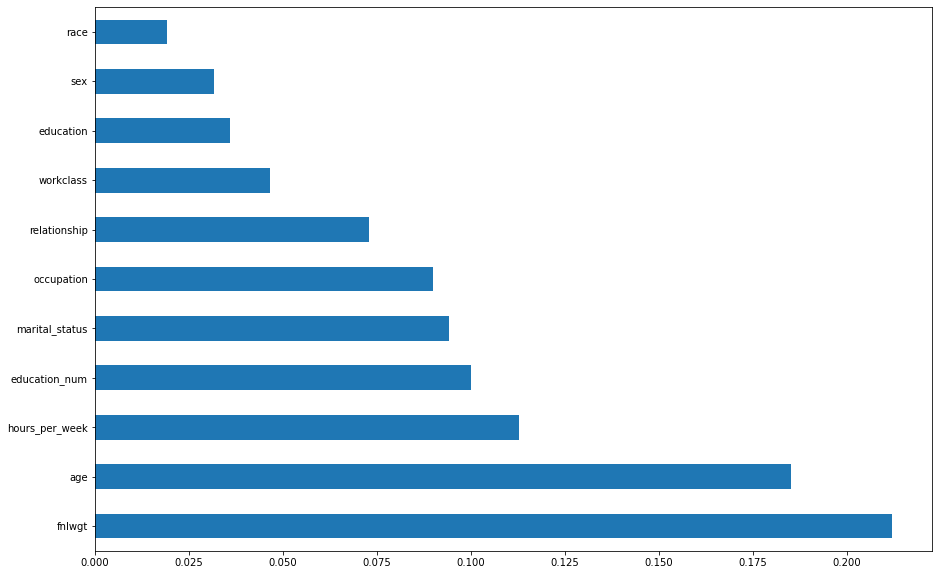

In [76]:
# Important Features rated by target variable correlation
feat_importances = pd.Series(model.feature_importances_, index=dataset.columns)
plt.figure(figsize = (15,10))
feat_importances.nlargest(11).plot(kind="barh")
plt.show()

### Correlation between variables

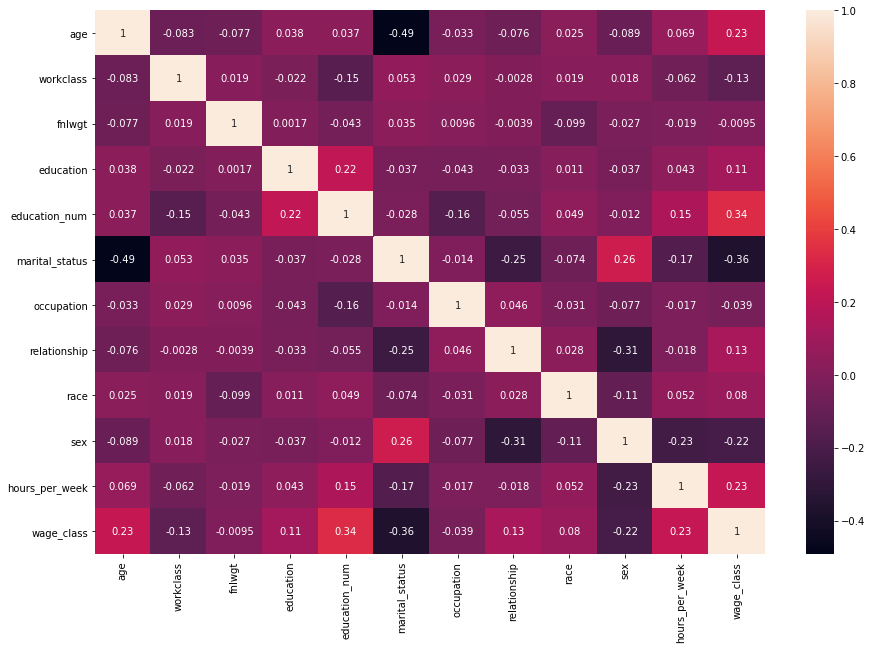

In [77]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(train_set.corr(), annot=True)

In [78]:
#correlation value of "wage_class" column with other columns
train_set.corr()['wage_class'][:-1].sort_values(ascending=False)

education_num     0.335154
age               0.234037
hours_per_week    0.229689
relationship      0.127583
education         0.114943
race              0.079782
fnlwgt           -0.009463
occupation       -0.039040
workclass        -0.127685
sex              -0.215980
marital_status   -0.363755
Name: wage_class, dtype: float64

##### Observation :-
1) from the heatmap "education" and "education.num" are highly correlated, same can be said about the "marital.status" and "relationship" ,thus we can drop "relationship" and "education_num"..

2) We can also drop  "workclass"  as "occupation" is sufficient.

3) "fnlwgt" is not useful to us as it refers to only the sampling in the census conducted and has no practical effect on the label

4) So, for prediction of whether a person makes over 50K per year or not from classic adult dataset we select "age" ,"hour_per_week" ,"education" , "marital_status" , "occupation" , "Sex" 

### Spliting Data into independent and dependent feature

##### for train data

In [79]:
data = train_set[["age" ,"hours_per_week" ,"education" , "marital_status" , "occupation" , "sex"]]
data.head()

,age,hours_per_week,education,marital_status,occupation,sex
0,39,40,12,5,3,0
1,50,13,12,2,7,0
2,38,40,3,4,4,0
3,53,40,11,2,4,0
4,28,40,12,2,5,1


In [80]:
train_target = train_set["wage_class"]

##### for test data

In [81]:
test_data = test_set[["age" ,"hours_per_week" ,"education" , "marital_status" , "occupation" , "sex"]]
test_data.head()

,age,hours_per_week,education,marital_status,occupation,sex
0,25,40,11,5,6,0
1,38,50,3,2,1,0
2,28,40,9,2,14,0
3,44,40,0,2,6,0
4,18,30,0,5,5,1


In [82]:
test_target = test_set["wage_class"]

### Standardization

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scalar = StandardScaler()
train_Scaled = scalar.fit_transform(data)

In [85]:
scalar = StandardScaler()
test_Scaled = scalar.fit_transform(test_data)

### Model Selection

In [86]:
from sklearn.metrics import confusion_matrix , classification_report

#### 1) Logistic Regression 

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_model = LogisticRegression()

In [89]:
log_model.fit(train_Scaled,train_target)

LogisticRegression()

In [90]:
## Mean Accuracy_score for train data
log_model.score(train_Scaled,train_target)

0.7677282638739596

In [91]:
## Mean Accuracy_score for test data
log_model.score(test_Scaled,test_target)

0.7655549413426693

In [92]:
data_predict = log_model.predict(test_Scaled)

In [93]:
## Confusion_matrix
confusion_matrix(test_target,data_predict)

array([[11488,   947],
       [ 2870,   976]], dtype=int64)

<Figure size 504x504 with 0 Axes>

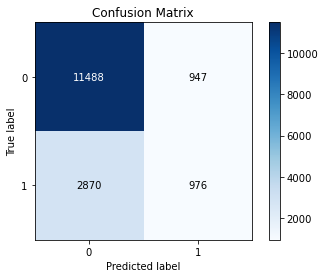

In [94]:
## plot confusion_matrix 
import scikitplot
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(test_target,data_predict)
plt.show()

In [95]:
print(classification_report(test_target,data_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     12435
           1       0.51      0.25      0.34      3846

    accuracy                           0.77     16281
   macro avg       0.65      0.59      0.60     16281
weighted avg       0.73      0.77      0.73     16281



#### 2) K-Nearest Neighbors Model

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier()

In [98]:
knn.fit(train_Scaled,train_target)

KNeighborsClassifier()

In [99]:
## Mean Accuracy_score for train data
knn.score(train_Scaled,train_target)

0.8558705199471761

In [100]:
## Mean Accuracy_score for test data
knn.score(test_Scaled,test_target)

0.8068300472943922

Our model in Underfitting

In [101]:
data_pred = knn.predict(test_Scaled)

<Figure size 504x504 with 0 Axes>

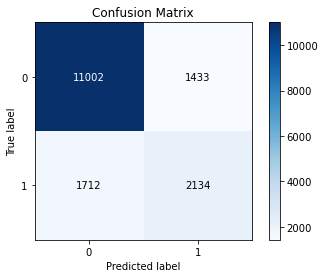

In [102]:
## plot confusion_matrix 
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(test_target,data_pred)
plt.show()

#### 3) Naive Bayes Model

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
naive_model = GaussianNB()

In [105]:
naive_model.fit(data,train_target)

GaussianNB()

In [106]:
## Mean Accuracy_score for train data
naive_model.score(data,train_target)

0.763858603851233

In [107]:
## Mean Accuracy_score for test data
naive_model.score(test_data,test_target)

0.7642036729930594

In [108]:
naive_pred = knn.predict(test_data)

<Figure size 504x504 with 0 Axes>

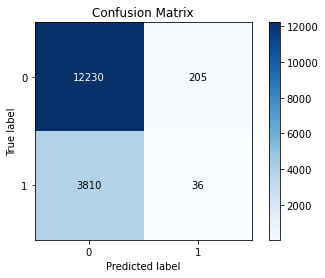

In [109]:
## plot confusion_matrix 
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(test_target,naive_pred)
plt.show()

#### 4) Decision Tree Classifier Model 

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
tree_model = DecisionTreeClassifier()

In [112]:
tree_model.fit(data,train_target)

DecisionTreeClassifier()

In [113]:
## Mean Accuracy_score for train data
tree_model.score(data,train_target)

0.9390374988483154

In [114]:
## Mean Accuracy_score for train data
tree_model.score(test_data,test_target)

0.7847183833916835

our model in underfitting problem.

In [115]:
tree_pred = tree_model.predict(test_data)

<Figure size 504x504 with 0 Axes>

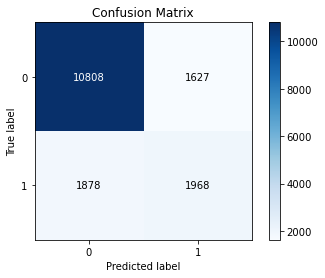

In [116]:
## plot confusion_matrix 
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(test_target,tree_pred)
plt.show()

#### 5) XGBoost Classifier Model

In [117]:
import xgboost as xgb

In [118]:
xg_model = xgb.XGBClassifier(random_state = 30 , learning_rate = 0.01,eval_metric='mlogloss')

In [119]:
xg_model.fit(train_Scaled,train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=30, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [120]:
xg_model.score(train_Scaled,train_target)

0.8248518165903995

In [121]:
xg_model.score(test_Scaled,test_target)

0.8263620170751182

xg_model is best model for over dataset bcz it does not comes in underfitting or overfitting roblem and it show 82% predication acurracy

In [122]:
xg_pred = xg_model.predict(test_Scaled)

<Figure size 504x504 with 0 Axes>

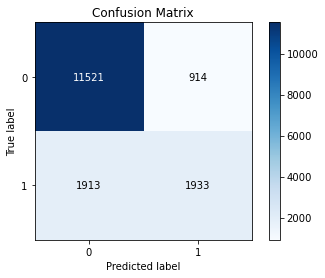

In [123]:
## plot confusion_matrix 
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(test_target,xg_pred)
plt.show()

In [124]:
confusion_matrix(test_target,xg_pred)

array([[11521,   914],
       [ 1913,  1933]], dtype=int64)

In [125]:
print(classification_report(test_target,xg_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12435
           1       0.68      0.50      0.58      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.71      0.73     16281
weighted avg       0.82      0.83      0.82     16281



##### Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
param_grid={
   
    'learning_rate':[0.1,0.01,0.001,0.05],
    'max_depth': [5,10,15,20],
    'n_estimators':[10,50,100,200]
}

In [128]:
grid = GridSearchCV(xgb.XGBClassifier(random_state = 30 , eval_metric='mlogloss'),param_grid, verbose=3)

In [129]:
grid.fit(train_Scaled,train_target)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.816 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.816 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.817 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.824 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.816 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.830 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.829 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.832 total time=   0.4s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.839 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.832 total time=   0.2

[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.809 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.810 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.811 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.809 total time=   0.3s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.815 total time=   0.8s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.813 total time=   0.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.815 total time=   0.6s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.820 total time=   0.7s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.818 total time=   0.6s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.820 total time=   1.3s
[CV 2/5] END learning_rate=0.01, max_depth=5

[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.809 total time=   0.6s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.800 total time=   0.6s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.806 total time=   0.6s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.804 total time=   1.6s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.808 total time=   1.5s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.809 total time=   1.4s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.810 total time=   1.3s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.806 total time=   1.7s
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.812 total time=   0.1s
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=10;, score=0.817 total time=   0.1s
[CV 3/5] END learning_rate=0.0

[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=0.837 total time=   1.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=0.846 total time=   1.2s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=0.839 total time=   1.5s
[CV 1/5] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=0.817 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=0.819 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=0.825 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=0.824 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=0.824 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=10, n_estimators=50;, score=0.831 total time=   0.8s
[CV 2/5] END learning_rate=0.05, max_depth=10, n_estimators=50;, score=0.828 total time=   0.8s
[CV 3/5] END learning_rate=0.05, max_dep

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=30,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
              

In [130]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}

In [141]:
# Create new model using the same parameters
new_model=xgb.XGBClassifier(learning_rate= 0.05, max_depth= 5, n_estimators= 200,eval_metric='mlogloss')
new_model.fit(train_Scaled, train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [142]:
new_model.score(train_Scaled,train_target)

0.8427873836798624

In [143]:
new_model.score(test_Scaled,test_target)

0.8372950064492353

In [144]:
xg_pred = new_model.predict(test_Scaled)

<Figure size 504x504 with 0 Axes>

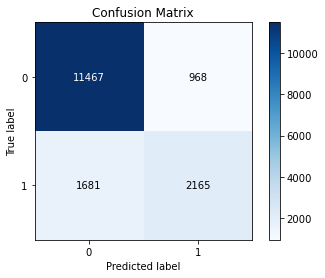

In [145]:
## plot confusion_matrix 
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(test_target,xg_pred)
plt.show()

In [146]:
confusion_matrix(test_target,xg_pred)

array([[11467,   968],
       [ 1681,  2165]], dtype=int64)

In [147]:
print(classification_report(test_target,xg_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



#### As we have increased the accuracy of the model, we'll save this model

In [148]:
import pickle

In [149]:
filename = 'xgboost_model.pickle'
pickle.dump(new_model, open(filename, 'wb'))

In [150]:
# we'll save the scaler object as well for prediction
filename_scaler = 'scaler_model.pickle'
pickle.dump(scalar, open(filename_scaler, 'wb'))